<a href="https://colab.research.google.com/github/shaharec/intro-to-Tensorflow-for-Deep-Learning/blob/master/l02c01_celsius_to_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies
first import tenserflow as tf' 
then import numpy as np.




In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Set up training data
we will give training samples to the function of celciuse to fahrenheit
$$ f = c \times 1.8 + 32 $$

In [ ]:
cel_q = np.array([-40, -10, 0,   8, 15, 22,  38],dtype = float)
fer_a = np.array([-40,  14, 32, 46, 59, 72, 100],dtype = float)

for i,c in enumerate(cel_q):
  print("{} degree celsius = {} degree Fahrenheit".format(c,fer_a[i]))

-40.0 degree celsius = -40.0 degree Fahrenheit
-10.0 degree celsius = 14.0 degree Fahrenheit
0.0 degree celsius = 32.0 degree Fahrenheit
8.0 degree celsius = 46.0 degree Fahrenheit
15.0 degree celsius = 59.0 degree Fahrenheit
22.0 degree celsius = 72.0 degree Fahrenheit
38.0 degree celsius = 100.0 degree Fahrenheit


**Features =** the features are the inputs -> celcius degree.

**Lables =** this is the output that we want to recive for every input, in this exaple is the degree in fahrenheit
**Exaples =**  A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

# Creat the model
after understanding what are we looking for, we will buld a model that can learn from are features the lables.
## Build a layer 
we will build a dense layer by usinf tensorflow Keras API.
`tf.keras.layers.Dense` will creat the dense layer.
we will need to specify the `input_shape = [1]` , the `units = 1` is the number of neurons in the layes and define how many internal variables we will have in the layer.

In [ ]:
l0 = tf.keras.layers.Dense(input_shape = [1],units = 1)

# Assemble layers into the modle 
after the layers is defined we will creat the model by adding to it the layers and the order of them/

In [ ]:
model = tf.keras.Sequential([l0])

In [ ]:
##we could have also creat the model with specifing the layese
# For exaple  
# modle  = tf.keras.sequential([tf.keras.layers.Dense(input_shape = [1],units = 1)])

# Compile the modle,with liss and optimizer function


In [ ]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))

#Train the model
Trining the model is bu using the method `fit` on the model.
parameters:
* inputs
* outputs
* epochs =  how many times the cycle should run.
* verbose=  controles gow much output the method produces.

In [ ]:
history = model.fit(cel_q,fer_a,epochs = 500,verbose = False)
print("Finished training")

Finished training


#Display training statistics
the `fit` method returns a history object. we can use this object to plot how the loss of our model goes down.
Weqll using Matplotlib to visualize the data.

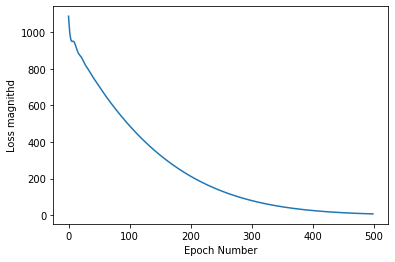

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss magnithd")
plt.plot(history.history['loss'])

#Use the model to predict values

In [ ]:
print(model.predict([100.0,5,50]))

[[211.33815]
 [ 38.42426]
 [120.33084]]


#Looking at the layers weight

In [ ]:
print("these are the layers variables: {}",format(l0.get_weights()))

these are the layers variables: {} [array([[1.8201462]], dtype=float32), array([29.323528], dtype=float32)]


the first variable is the theta and the second one is the bias.
we can see that the outcome is theta~1.8 and b~32.
so our network learnd the equation $f = 1.8x + 32.$  

## A title expiriment
Now we will try adding more layers (more variables)

In [ ]:
l0 = tf.keras.layers.Dense(units = 4,input_shape = [1])
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)
model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss ='mean_squared_error',optimizer = tf.keras.optimizers.Adam(0.1))
model.fit(cel_q, fer_a, epochs=500, verbose=False)
print("Finish training")
print(model.predict([100]))
print("these are the 1 layers variables: {}",format(l0.get_weights()))
print("these are the 2 layers variables: {}",format(l1.get_weights()))
print("these are the 3 layers variables: {}",format(l2.get_weights()))

Finish training
[[211.74742]]
these are the 1 layers variables: {} [array([[ 0.32164514, -0.07713844,  0.53342134, -0.8470354 ]],
      dtype=float32), array([-3.086887 , -3.2811823,  3.2332351, -3.6862292], dtype=float32)]
these are the 2 layers variables: {} [array([[-0.59589785,  0.88862437,  0.03010455,  0.64851457],
       [-0.0069522 , -0.31684032, -0.38055706,  1.0406241 ],
       [ 0.8993146 , -0.02264282, -1.1591457 ,  0.24148414],
       [-0.48860502,  0.36269182,  0.12757137,  1.1098471 ]],
      dtype=float32), array([ 3.4598598, -2.1722772, -2.851028 , -3.540708 ], dtype=float32)]
these are the 3 layers variables: {} [array([[ 0.72631603],
       [-0.30639184],
       [-0.5540111 ],
       [-1.3239582 ]], dtype=float32), array([3.5296817], dtype=float32)]
